<a href="https://colab.research.google.com/github/mebkdas/Python/blob/master/ML_CA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import io 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
import seaborn as sns

**Import Dataset and Create Header**

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data')

#Creating Header for the dataset
header = ["Vendor-Name","Model-Name","MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP","ERP"]

df.columns = header

#first 5 rows
print("First 5 rows of my dataset is : ")
df.head()

First 5 rows of my dataset is : 


,Vendor-Name,Model-Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


**Data Preprocessing**

In [3]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [4]:
df.replace("?",np.nan,inplace= True)

missing_data = df.isnull()
missing_data

print("Missing values in the dataset:",df.isnull().sum().max())

Missing values in the dataset: 0


**Observations:**
1.   There are no missing values in the dataset.
2.   There are 2 Categorical variables
*    Vendor,Model
3.   There are 8 Numerical variables
*    MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP

**Apply SVM Algo**

In [5]:
MMIN_df = df[df['MMIN']==2000][0:207]
MMAX_df = df[df['MMAX']==8000][0:207]

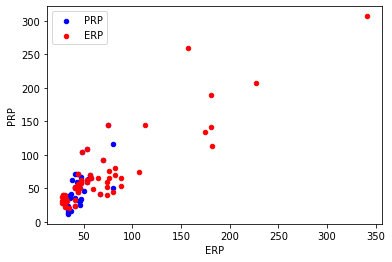

In [6]:
axes = MMAX_df.plot(kind='scatter', x='ERP', y='PRP', color='blue', label='PRP')
MMIN_df.plot(kind='scatter', x='ERP', y='PRP', color='red', label='ERP', ax=axes)

In [7]:
feature_df = df[['MYCT', 'MMIN', 'MMAX', 'CHMIN','CHMAX', 'PRP', 'ERP']]
#Independent Var
X=np.asarray(feature_df)
#dependent Var
y=np.asarray(df['CACH'])
print("X= " , X[0:5])
print("Y= " , y[0:5])

X=  [[   29  8000 32000     8    32   269   253]
 [   29  8000 32000     8    32   220   253]
 [   29  8000 32000     8    32   172   253]
 [   29  8000 16000     8    16   132   132]
 [   26  8000 32000     8    32   318   290]]
Y=  [32 32 32 32 64]


In [8]:
#we will divide data in train part and divide part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(166, 7)
(42, 7)
(166,)
(42,)


In [10]:
svc = svm.SVC(kernel='linear', C=2, gamma='auto').fit(X_train, y_train)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.38      0.89      0.53         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         1
          24       1.00      0.67      0.80         3
          30       0.00      0.00      0.00         2
          32       0.62      0.83      0.71         6
          48       0.00      0.00      0.00         1
          64       0.33      0.50      0.40         2
          65       0.00      0.00      0.00         1
         112       0.33      1.00      0.50         1
         128       0.00      0.00      0.00         1
         142       0.00      0.00      0.00         1

    accuracy                           0.40        42
   macro avg       0.17   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
